In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
datapath = '/content/drive/MyDrive/GreateL/MainCapstone/crashfinal_v1.plk'
dfCrash = pd.read_pickle(datapath)

In [ ]:
dfCrash.sample(2)

,uid,latitude,longitude,StreetName,datetime,accident,year,month,day,hour,minute,second,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
17383,4748,-1.244793,36.867699,Thika Road,2019-02-07,0,2019,2,7,21,28,9,3,0,0,-72.887102,195.586667,162.887102,2019-02-07,25.300001,61.799999,0.00906,16.818903,-2.969485,-1.467734
18405,5770,-1.231032,36.877597,Thika Road,2019-05-02,0,2019,5,2,18,1,7,3,0,0,-36.647358,288.387581,126.647358,2019-05-02,18.100000,72.700005,0.00936,14.914697,-1.843445,-2.188745


In [ ]:
# drop columns which are not required for EDA etc.
dfCrash.dtypes

uid                                       int64
latitude                                float64
longitude                               float64
StreetName                               object
datetime                                 object
accident                                  int64
year                                      int64
month                                     int64
day                                       int64
hour                                      int64
minute                                    int64
second                                    int64
day_of_week                               int64
is_day_off                                int64
national_holiday                          int64
elevation                               float64
azimuth                                 float64
zenith                                  float64
Date                                     object
precipitable_water_entire_atmosphere    float64
relative_humidity_2m_above_ground       

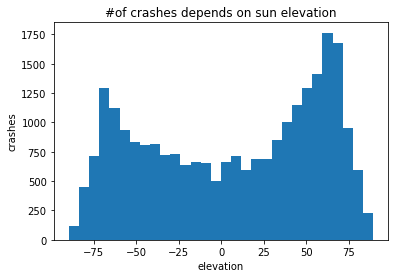

In [ ]:
plt.title('#of crashes depends on sun elevation')
plt.hist(dfCrash.elevation, bins=30);
plt.xlabel('elevation')
plt.ylabel('crashes');

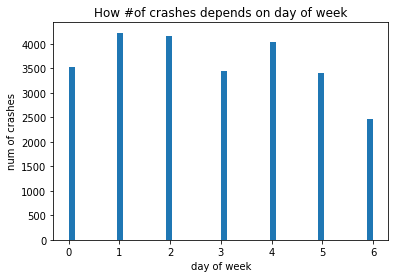

In [ ]:
plt.title('How #of crashes depends on day of week')
plt.hist(dfCrash.day_of_week, bins=50)
plt.xlabel('day of week')
plt.ylabel('num of crashes')
plt.show()

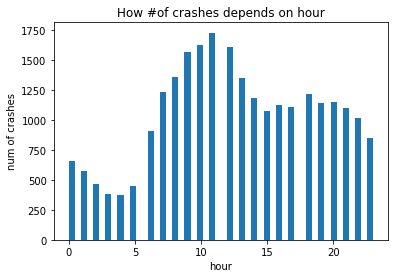

In [ ]:
plt.title('How #of crashes depends on hour')
plt.hist(dfCrash.hour, bins=50)
plt.xlabel('hour')
plt.ylabel('num of crashes')
plt.show()

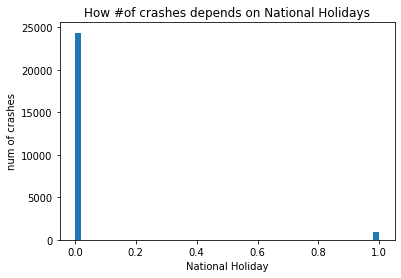

In [ ]:
plt.title('How #of crashes depends on National Holidays')
plt.hist(dfCrash.national_holiday, bins=50)
plt.xlabel('National Holiday')
plt.ylabel('num of crashes')
plt.show()

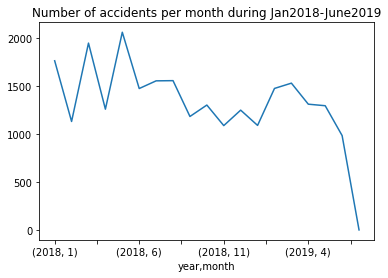

In [ ]:
gp=dfCrash.groupby(['year','month']).size()
gp.plot(title="Number of accidents per month during Jan2018-June2019")
plt.show()

In [ ]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [ ]:
app = Nominatim(user_agent="tutorial")
# get location raw data
location = app.geocode("Nairobi, Kenya").raw
# print raw data
pprint(location)

{'boundingbox': ['-1.444471', '-1.163332', '36.6509378', '37.1038871'],
 'class': 'place',
 'display_name': 'Nairobi, Kenya',
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png',
 'importance': 0.845026759433763,
 'lat': '-1.3031689499999999',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.826061224105075',
 'osm_id': 9185096,
 'osm_type': 'relation',
 'place_id': 296789203,
 'type': 'city'}


In [ ]:
!pip install folium

In [ ]:
dfCrash['StreetName'].value_counts()

Thika Road             3992
Mombasa Road           3292
Nairobi-Nakuru Road    1196
                       1140
Langata Road            748
                       ... 
street_lamp               4
Melili Road               4
Sungura Mjanja Way        4
Bemuda Plaza              4
Hamilton House            4
Name: StreetName, Length: 563, dtype: int64

In [ ]:
dfStreet= dfCrash['StreetName'].value_counts().to_frame().reset_index()

In [ ]:
dfStreet.sample(2)

,index,StreetName
392,Sagret Hotel Equatorial,4
514,Ring Road Westlands,4


In [ ]:
dfStreet.rename(columns={'index':'StreetName','StreetName':'Count'}, inplace=True)

In [ ]:
dfStreet.sort_values(by=['Count'],ascending=False)

,StreetName,Count
0,Thika Road,3992
1,Mombasa Road,3292
2,Nairobi-Nakuru Road,1196
3,,1140
4,Langata Road,748
...,...,...
405,Driving School,4
406,Reheboth Centre,4
407,zuka bus stop,4
408,Tusky's parking,4


In [ ]:
dfstreet1 = dfCrash[dfCrash['StreetName']=='Thika Road']

In [ ]:
dfstreet1.shape

(3992, 25)

In [ ]:
dfstreet1.sample(2)

,uid,latitude,longitude,StreetName,datetime,accident,year,month,day,hour,minute,second,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
12997,362,-1.235521,36.872734,Thika Road,2018-01-25,0,2018,1,25,15,35,11,3,0,0,3.012887,251.173335,86.987113,2018-01-25,23.513014,86.500000,0.011351,15.077936,-3.328689,-2.541384
23380,4427,-1.215095,36.897148,Thika Road,2019-01-04,0,2019,1,4,20,20,9,4,0,0,-59.468181,217.127942,149.468181,2019-01-04,25.297779,87.566109,0.011591,15.242639,-2.718049,-2.138960


In [ ]:
dfstreet1.columns

Index(['uid', 'latitude', 'longitude', 'StreetName', 'datetime', 'accident',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'day_of_week',
       'is_day_off', 'national_holiday', 'elevation', 'azimuth', 'zenith',
       'Date', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground'],
      dtype='object')

In [ ]:
dfstreet_1 = dfstreet1[['latitude', 'longitude', 'accident',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'day_of_week',
       'is_day_off', 'national_holiday', 'elevation', 'azimuth', 'zenith',
        'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground']]

In [ ]:
dfstreet_1.sample(2)

,latitude,longitude,accident,year,month,day,hour,minute,second,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
15204,-1.218637,36.891361,0,2018,7,12,17,56,54,3,0,0,-32.345925,295.301181,122.345925,24.300001,76.300003,0.00910,13.658075,-0.360057,0.286040
2721,-1.259975,36.843418,1,2018,7,24,19,30,54,1,0,0,-53.568600,302.595988,143.568600,19.000000,85.653336,0.00909,11.950006,-0.959653,-0.311309


In [ ]:
datawithstreetname       = '/content/drive/MyDrive/GreateL/MainCapstone/crashfinal.plk'
trainpath                = '/content/drive/MyDrive/GreateL/MainCapstone/Train.csv'
weatherpath              = '/content/drive/MyDrive/GreateL/MainCapstone/Weather_Nairobi_Daily_GFS.csv'

In [ ]:
weather = pd.read_csv(weatherpath, parse_dates=['Date'])
weather.Date = weather.Date.apply(lambda x : x.date())

In [ ]:
weather.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459


In [ ]:
import datetime

Get weather records from 1-7-2019 and onwards

In [ ]:
weather_test = weather[weather['Date'] >= datetime.date(2019,7,1)]

In [ ]:
weather_test.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
546,2019-07-01,25.700001,88.300003,0.01185,15.550012,-1.421973,1.536345
547,2019-07-02,24.300001,85.200005,0.01109,15.062555,-2.027866,-0.101880


In [ ]:
#crashfinal['accident'] =-1
weather_test['Date'] = weather_test['Date'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import random

In [ ]:
def datesplit(x) :
    # input value E.g. 2018-02-21 16:32:13
    #date_time = x.split(' ')  # split this "2018-02-21 16:32:13"
    #date = date_time[0]       # 2018-02-21
    #time = date_time[1]       # 16:32:13
    date1 = x.split('-')   # split this "2018-02-21"
    year=date1[0]
    month=date1[1]
    day = date1[2]
    #time1= time.split(':')    # split this "16:32:13"
    hour = random.randint(0, 23)
    minute = random.randint(0,59)
    second = random.randint(0,59)
    # The day of the week with Monday=0, Sunday=6.
    day_of_week = datetime.date(pd.to_numeric(year),pd.to_numeric(month),pd.to_numeric(day)).weekday()
    dic1= {5: 1, 6: 1, 0:0, 1:0, 2:0, 3:0, 4:0}
    is_day_off = dic1[day_of_week] 

    return pd.Series([year, month, day, hour, minute, second,day_of_week,is_day_off])

In [ ]:
weather_test[['year','month','day','hour','minute','second','day_of_week','is_day_off']]= weather_test['Date'].apply(datesplit)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
weather_test.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,hour,minute,second,day_of_week,is_day_off
546,2019-07-01,25.700001,88.300003,0.01185,15.550012,-1.421973,1.536345,2019,07,01,22,0,13,0,0
547,2019-07-02,24.300001,85.200005,0.01109,15.062555,-2.027866,-0.101880,2019,07,02,12,10,55,1,0


In [ ]:
print(weather_test['year'].value_counts())
print(weather_test['month'].value_counts())
print(weather_test['day'].value_counts())

2019    184
2020      1
Name: year, dtype: int64
07    31
12    31
08    31
10    31
11    30
09    30
01     1
Name: month, dtype: int64
01    7
14    6
13    6
18    6
29    6
10    6
30    6
22    6
11    6
12    6
07    6
16    6
06    6
05    6
02    6
04    6
28    6
20    6
17    6
23    6
03    6
09    6
27    6
08    6
15    6
26    6
19    6
24    6
21    6
25    6
31    4
Name: day, dtype: int64


In [ ]:
weather_test.dtypes

Date                                     object
precipitable_water_entire_atmosphere    float64
relative_humidity_2m_above_ground       float64
specific_humidity_2m_above_ground       float64
temperature_2m_above_ground             float64
u_component_of_wind_10m_above_ground    float64
v_component_of_wind_10m_above_ground    float64
year                                     object
month                                    object
day                                      object
hour                                      int64
minute                                    int64
second                                    int64
day_of_week                               int64
is_day_off                                int64
dtype: object

In [ ]:
weather_test['Date'] = weather_test['Date'].astype('datetime64')
weather_test['year'] = weather_test['year'].astype('int64')
weather_test['month'] = weather_test['month'].astype('int64')
weather_test['day'] = weather_test['day'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#reset index value...from zero
weather_test.reset_index(inplace=True,drop=True)

In [ ]:
weather_test.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,hour,minute,second,day_of_week,is_day_off
0,2019-07-01,25.700001,88.300003,0.01185,15.550012,-1.421973,1.536345,2019,7,1,22,0,13,0,0
1,2019-07-02,24.300001,85.200005,0.01109,15.062555,-2.027866,-0.101880,2019,7,2,12,10,55,1,0


In [ ]:
!pip install holidays

In [ ]:
!pip install astral==2.2

In [ ]:
import holidays
from datetime import date

import astral
from astral.geocoder import database, lookup
city = lookup("Nairobi", database())
city

from astral.sun import zenith_and_azimuth, elevation

In [ ]:
def add_holiday_feature(df):
  ZA_holidays = holidays.ZA()
  list_of_holidays = [int(date(df.year[i], df.month[i], df.day[i]) in ZA_holidays) for i in range(df.shape[0])]
  df['national_holiday'] = list_of_holidays
  return df

In [ ]:
from tqdm import tqdm
def add_zenith_azimuth_elevation_feature(df):
  import datetime
  zen = []
  azi = []
  ele = []
  for i in tqdm(range(df.shape[0])):
    ze, az =  zenith_and_azimuth(city.observer, datetime.datetime(df.year[i], df.month[i], df.day[i], df.hour[i], df.minute[i], df.second[i]))
    el = elevation(city.observer, datetime.datetime(df.year[i], df.month[i], df.day[i], df.hour[i], df.minute[i], df.second[i]))
    zen.append(ze)
    azi.append(az)
    ele.append(el)
  df['elevation'] = ele
  df['azimuth'] = azi
  df['zenith'] = zen
  return df

In [ ]:
weather_test = add_holiday_feature(weather_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
weather_test = add_zenith_azimuth_elevation_feature(weather_test)

100%|██████████| 185/185 [00:00<00:00, 4414.91it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
weather_test.head(4)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,hour,minute,second,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith
0,2019-07-01,25.700001,88.300003,0.01185,15.550012,-1.421973,1.536345,2019,7,1,22,0,13,0,0,0,-67.471039,14.234211,157.471039
1,2019-07-02,24.300001,85.200005,0.01109,15.062555,-2.027866,-0.101880,2019,7,2,12,10,55,1,0,0,45.335139,305.396284,44.664861
2,2019-07-03,25.300001,85.700005,0.01032,13.883295,-1.241565,-0.287003,2019,7,3,8,19,40,2,0,0,59.311619,36.649215,30.688381
3,2019-07-04,26.400000,76.500000,0.00981,14.831659,-1.853691,-0.736606,2019,7,4,16,0,29,3,0,0,-5.801588,292.847645,95.801588


In [ ]:
weather_test.dtypes

Date                                    datetime64[ns]
precipitable_water_entire_atmosphere           float64
relative_humidity_2m_above_ground              float64
specific_humidity_2m_above_ground              float64
temperature_2m_above_ground                    float64
u_component_of_wind_10m_above_ground           float64
v_component_of_wind_10m_above_ground           float64
year                                             int64
month                                            int64
day                                              int64
hour                                             int64
minute                                           int64
second                                           int64
day_of_week                                      int64
is_day_off                                       int64
national_holiday                                 int64
elevation                                      float64
azimuth                                        float64
zenith    

In [ ]:
dfCrash['latitude'].describe()

count    25272.000000
mean        -1.270338
std          0.125150
min         -3.050000
25%         -1.316585
50%         -1.271709
75%         -1.233746
max         -0.565402
Name: latitude, dtype: float64

In [ ]:
dfCrash['longitude'].describe()

count    25272.000000
mean        36.855459
std          0.112859
min         36.332202
25%         36.802048
50%         36.844591
75%         36.895726
max         37.879490
Name: longitude, dtype: float64

Lets randomly get some geolocation points

In [ ]:
def getlatlongStreet() :
  lattitude = random.uniform(-3.050000,-0.565402)
  longittude = random.uniform(36.332202,37.879490)

In [ ]:
weather_test['latitude'] =0
weather_test['longitude'] =0
weather_test['accident']=0
weather_test['StreetName']=''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
import requests

In [ ]:
def extractLocationDetails(lat, long) :
    URL= "http://open.mapquestapi.com/geocoding/v1/reverse"
    PARAMS = {'key' :'IOKcGR2KoWqMCsJ7SqkTubB8ZV2PglKP', 'location':str(lat) + ',' + str(long)}
    r = requests.get(url=URL, params=PARAMS)
    result = r.json()
    streetname = result['results'][0]['locations'][0]['street']
    return streetname

In [ ]:
weather_test.shape

(185, 23)

In [ ]:
for index, row in weather_test.iterrows() :  
  counter =0
  while True :
    lat = random.uniform(-3.050000,-0.565402)
    longi = random.uniform(36.332202,37.879490)
    streetname1 = extractLocationDetails(lat, longi)
    print(streetname1)
    counter = counter +1
    if (counter >3) :
      counter =0
      break
    if (len(streetname1)!=0) :      
      weather_test.loc[index,'latitude'] = lat
      weather_test.loc[index,'longitude'] = longi
      weather_test.loc[index,'StreetName'] = streetname1
      break












Magadi Road






Mombasa Road


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)



Garissa Road
Great North Road




Mombasa Road





South Sea


Muranga Kiriaini Roads

























nzuuli road



Kapenguria Road














Oldare-1 Road





Shira Service Road
















Old Mt. Suswa Road

Ajabu House





Brookside Drive

















kalisa earthdam












Pipeline Road
Kimende Hilton Gwa Kabatha













Wambos hotel


kwavonza-k.u. kitui campus road






















Mt. Suswa Road






Nairobi - Mombasa Railway

Ostrich Farm Road














Mombasa Road





Nairobi-Nakuru Road

Kirongothi Road






Pipeline












POMC Najile




Nairobi - Mombasa Railway





Kindaruma dam



Impala_observation_point

Kangundo Road






Patel Road
Lake Road









South Sea


















Muranga Kiriaini Roads

Lemosho Route
Kajiado Airport







Nairobi - Mombasa Railway



Summit Road










Mt. Suswa Road








Doonholm Road

























Bishop Road









Athi River-Namanga Road







Mombasa Roa

In [ ]:
weather_test[weather_test['StreetName']!='']

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,hour,minute,second,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,StreetName
4,2019-07-05,23.100000,78.000000,0.009860,14.667963,-1.543833,-1.288035,2019,7,5,9,5,36,4,0,0,64.720120,17.335689,25.279880,-2.220412,37.720506,0,Mombasa Road
5,2019-07-06,23.500000,89.599998,0.011520,14.844812,-1.407830,-0.236489,2019,7,6,6,26,32,5,1,0,37.723235,59.645840,52.276765,-1.109002,37.761823,0,Garissa Road
6,2019-07-07,23.900000,88.400002,0.011590,15.147089,-2.169480,0.245134,2019,7,7,10,43,26,6,1,0,61.261454,327.100321,28.738546,-1.004965,36.593410,0,Great North Road
8,2019-07-09,18.900000,88.400002,0.011490,15.030756,-2.245942,-0.675012,2019,7,9,2,5,3,1,0,0,-21.887422,66.305456,111.887422,-1.944646,37.281102,0,Mombasa Road
10,2019-07-11,23.200001,83.500000,0.010820,14.993127,-1.892627,-0.310281,2019,7,11,13,27,57,3,0,0,29.401630,296.379449,60.598370,-0.832725,36.340923,0,South Sea
11,2019-07-12,22.000000,90.800003,0.010950,13.850000,-1.361096,-1.109114,2019,7,12,8,56,30,4,0,0,64.592748,23.134157,25.407252,-0.650849,37.078757,0,Muranga Kiriaini Roads
18,2019-07-19,17.900000,88.099998,0.010350,13.450006,-2.041497,-0.601052,2019,7,19,4,6,24,4,0,0,6.055757,68.833507,83.944243,-0.940922,37.866882,0,nzuuli road
23,2019-07-24,23.900000,76.500000,0.010220,15.453088,-1.168296,-0.584072,2019,7,24,12,7,6,2,0,0,48.078380,302.238098,41.921620,-2.694621,37.327266,0,Oldare-1 Road
25,2019-07-26,24.400000,71.900002,0.008630,13.814569,-1.184233,-1.131643,2019,7,26,6,18,39,4,0,0,36.617199,64.394001,53.382801,-2.978396,37.109614,0,Shira Service Road
30,2019-07-31,31.200001,90.800003,0.011920,15.150018,-1.477850,-0.309894,2019,7,31,20,1,33,2,0,0,-60.677679,306.685530,150.677679,-1.108438,36.376448,0,Old Mt. Suswa Road


In [ ]:
weather_test.to_pickle('/content/drive/MyDrive/GreateL/MainCapstone/testdata.plk')

In [ ]:
datapath = '/content/drive/MyDrive/GreateL/MainCapstone/testdata.plk'
dftest = pd.read_pickle(datapath)

In [ ]:
weather_test = weather[weather['Date'] >= datetime.date(2019,7,1)]

In [ ]:
import datetime

In [ ]:
# dfTest1= dftest[dftest['Date'] == pd.to_datetime('2019-09-05')]
dfTest1= dftest[dftest['Date'] >= pd.to_datetime('2019-09-01')][dftest['Date'] <= pd.to_datetime('2019-09-30')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
dfTest1.shape

(30, 23)

In [ ]:
dfTest1.reset_index(inplace=True,drop=True)

In [ ]:
dfTest1= pd.concat([dfTest1]*3000,ignore_index=True)

In [ ]:
dfTest1.shape

(90000, 23)

In [ ]:
import random

In [ ]:
def datesplit(x) :
    # input value E.g. 2018-02-21 16:32:13
    #date_time = x.split(' ')  # split this "2018-02-21 16:32:13"
    #date = date_time[0]       # 2018-02-21
    #time = date_time[1]       # 16:32:13
    date1 = x.split('-')   # split this "2018-02-21"
    year=date1[0]
    month=date1[1]
    day = date1[2]
    #time1= time.split(':')    # split this "16:32:13"
    hour = random.randint(0, 23)
    minute = random.randint(0,59)
    second = random.randint(0,59)
    # The day of the week with Monday=0, Sunday=6.
    day_of_week = datetime.date(pd.to_numeric(year),pd.to_numeric(month),pd.to_numeric(day)).weekday()
    dic1= {5: 1, 6: 1, 0:0, 1:0, 2:0, 3:0, 4:0}
    is_day_off = dic1[day_of_week] 

    return pd.Series([hour, minute, second])

In [ ]:
dfTest1.drop(columns=['hour','minute','second'], inplace=True)

KeyError: ignored

In [ ]:
dfTest1['Date']=dfTest1['Date'].astype(str)

In [ ]:
dfTest1[['hour','minute','second']]= dfTest1['Date'].apply(datesplit)

In [ ]:
dfTest1['Date']=dfTest1['Date'].astype('datetime64')

In [ ]:
dfTest1.head(3)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,StreetName,hour,minute,second
0,2019-09-05,21.9,83.900002,0.01031,14.149988,-1.792676,-0.655737,2019,9,5,3,0,0,67.423185,68.558689,22.576815,-1.08393,36.531292,0,Pipeline,4,57,22
1,2019-09-05,21.9,83.900002,0.01031,14.149988,-1.792676,-0.655737,2019,9,5,3,0,0,67.423185,68.558689,22.576815,-1.08393,36.531292,0,Pipeline,12,33,42
2,2019-09-05,21.9,83.900002,0.01031,14.149988,-1.792676,-0.655737,2019,9,5,3,0,0,67.423185,68.558689,22.576815,-1.08393,36.531292,0,Pipeline,6,40,9


In [ ]:
dfTest1.reset_index(inplace=True,drop=True)

In [ ]:
dfTest1 = add_zenith_azimuth_elevation_feature(dfTest1)

100%|██████████| 90000/90000 [00:16<00:00, 5587.00it/s]


In [ ]:
for index, row in dfTest1.iterrows() :  
  lat = random.uniform(-3.050000,-0.565402)
  longi = random.uniform(36.332202,37.879490)
  dfTest1.loc[index,'latitude'] = lat
  dfTest1.loc[index,'longitude'] = longi

In [ ]:
dfTest1['StreetName']=''

In [ ]:
dfTest1.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,StreetName,hour,minute,second
0,2019-09-01,27.6,85.700005,0.01173,15.846185,-1.054788,-0.931064,2019,9,1,6,1,0,64.271312,67.628180,25.728688,-2.492851,36.473674,0,,7,57,11
1,2019-09-02,27.1,86.099998,0.01219,16.346185,-1.285581,-0.270176,2019,9,2,0,0,0,23.801243,279.197038,66.198757,-2.145861,37.350431,0,,13,55,44


In [ ]:
dfTest1.to_pickle('/content/drive/MyDrive/GreateL/MainCapstone/testdata_oneday_3000rec.plk')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dfTest1 = pd.read_pickle('/content/drive/MyDrive/GreateL/MainCapstone/testdata_oneday.plk')

In [ ]:
dfTest1.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,StreetName,hour,minute,second
0,2019-09-05,21.9,83.900002,0.01031,14.149988,-1.792676,-0.655737,2019,9,5,3,0,0,-47.764458,278.579770,137.764458,-0.836328,37.778589,0,Pipeline,18,43,30
1,2019-09-05,21.9,83.900002,0.01031,14.149988,-1.792676,-0.655737,2019,9,5,3,0,0,-69.759737,74.105357,159.759737,-2.024789,36.865145,0,Pipeline,22,49,44


In [ ]:
dfTest1['hour'].value_counts()

22    18
0     16
21    16
15    15
20    15
9     15
13    15
16    15
11    14
19    14
18    13
10    13
8     13
4     12
14    11
17    11
7     11
3     11
23    11
12    10
6     10
5      8
2      7
1      6
Name: hour, dtype: int64

In [ ]:
def timezon(x) :
  if (x >= 0 and x <= 2) :
    return "1"
  elif (x >= 3 and x <= 5) :
    return "2"
  elif (x >= 6 and x <= 8) :
    return "3"
  elif (x >= 9 and x <= 11) :
    return "4"
  elif (x >= 12 and x <= 14) :
    return "5"
  elif (x >= 15 and x <= 17) :
    return "6"
  elif (x >= 18 and x <= 21) :
    return "7"
  elif (x >= 22 and x <= 23) :
    return "8"

In [ ]:
dfTest1.head(1)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,StreetName,hour,minute,second,TimeZone
0,2019-09-05,21.9,83.900002,0.01031,14.149988,-1.792676,-0.655737,2019,9,5,3,0,0,21.122024,82.078032,68.877976,-2.142382,37.784699,0,Pipeline,4,57,22,2


In [ ]:
dfTest1['TimeZone'] = dfTest1['hour'].apply(timezon)

In [ ]:
dfTest1.to_pickle('/content/drive/MyDrive/GreateL/MainCapstone/testdata_30days_3000rec.plk')

In [ ]:
dfTest1.to_pickle('/content/drive/MyDrive/GreateL/MainCapstone/testdata_oneday_3000rec.plk')

In [ ]:
datapath= '/content/drive/MyDrive/GreateL/MainCapstone/testdata_30days_3000rec_predictions.plk'
dfresults = pd.read_pickle(datapath)

In [ ]:
dfresults.head(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,StreetName,hour,minute,second,TimeZone
0,2019-09-01,27.6,85.700005,0.01173,15.846185,-1.054788,-0.931064,2019,9,1,6,1,0,64.271312,67.628180,25.728688,-2.492851,36.473674,1,,7,57,11,3
1,2019-09-02,27.1,86.099998,0.01219,16.346185,-1.285581,-0.270176,2019,9,2,0,0,0,23.801243,279.197038,66.198757,-2.145861,37.350431,0,,13,55,44,5


In [ ]:
dfresults['timezon'] = dfresults['hour'].apply(timezon)

In [ ]:
dfgroup = dfresults.groupby('Date').sum()

In [ ]:
dfgroup.sample(2)

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,year,month,day,day_of_week,is_day_off,national_holiday,elevation,azimuth,zenith,latitude,longitude,accident,hour,minute,second
24,2019-09-25,79199.998856,258000.0,33.869999,45450.054932,-4448.298097,-1384.313911,6057000,27000,75000,6000,0,0,389.859956,544163.520216,269610.140044,-5420.697005,111352.761491,325,34777,89157,88484
11,2019-09-12,60000.000000,265500.0,33.930000,44254.010010,-7273.718119,-4905.227065,6057000,27000,36000,9000,0,0,2865.737417,540815.022092,267134.262583,-5429.852479,111302.120293,358,34182,88886,87184


In [ ]:
dfgroup.reset_index(inplace=True)

In [ ]:
dfgroup[['Date','accident']]

,Date,accident
0,2019-09-01,136
1,2019-09-02,374
2,2019-09-03,366
3,2019-09-04,368
4,2019-09-05,338
5,2019-09-06,355
6,2019-09-07,466
7,2019-09-08,223
8,2019-09-09,322
9,2019-09-10,387


In [ ]:
dfgroup['Date']=dfgroup['Date'].astype(str)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

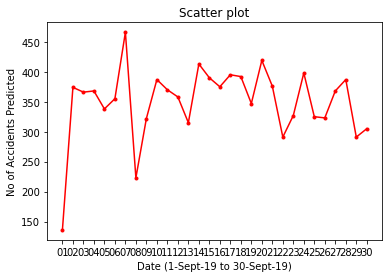

In [ ]:
plt.plot(dfgroup['Date'].head(30).apply(lambda x :str(x).split('-')[2]),dfgroup['accident'].head(30),
            marker = '.',linestyle='solid',color='red')
plt.title('Scatter plot')
plt.xlabel('Date (1-Sept-19 to 30-Sept-19)')
plt.ylabel('No of Accidents Predicted')
plt.show()

In [ ]:
import datetime

In [ ]:
df1 = dfCrash[dfCrash['Date']>= datetime.date(2018,9,1)][dfCrash['Date']<= datetime.date(2018,9,30)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df1 = df1.groupby('Date').sum()

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
df1['Date']=df1['Date'].astype(str)

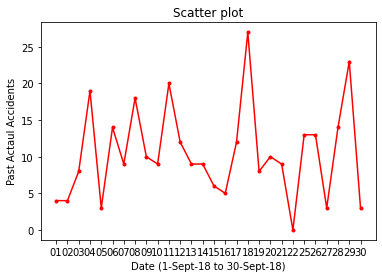

In [ ]:
plt.plot(df1['Date'].head(30).apply(lambda x :str(x).split('-')[2]),df1['accident'].head(30),
            marker = '.',linestyle='solid',color='red')
plt.title('Scatter plot')
plt.xlabel('Date (1-Sept-18 to 30-Sept-18)')
plt.ylabel('Past Actaul Accidents')
plt.show()